In [ ]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd
#import geopandas as gpd
import os

In [ ]:
PATH = r'/home/benoit.hohl/shared-projects/ML4WATER/RAW_DATA/swisstransfer_599b7dff-3a67-4c05-a13e-d9514bcbc376'#/mnt/remote/shared-projects/ML4WATER/RAW_DATA#'../../ML4WATER_DATA/swisstransfer_599b7dff-3a67-4c05-a13e-d9514bcbc376'

In [ ]:
air_stations = pd.read_csv(os.path.join(PATH, 'coordinates_air_boiron_stations.csv'))
air_stations.set_index('Station', inplace=True)
water_stations = pd.read_csv(os.path.join(PATH, 'coordinates_water_boiron_stations.csv'))
water_stations.set_index('CODE_MdlR', inplace=True)
water_stations['Altitude'] = [int(c.split('_')[-1]) for c in water_stations['CODE_RTV_2021']]

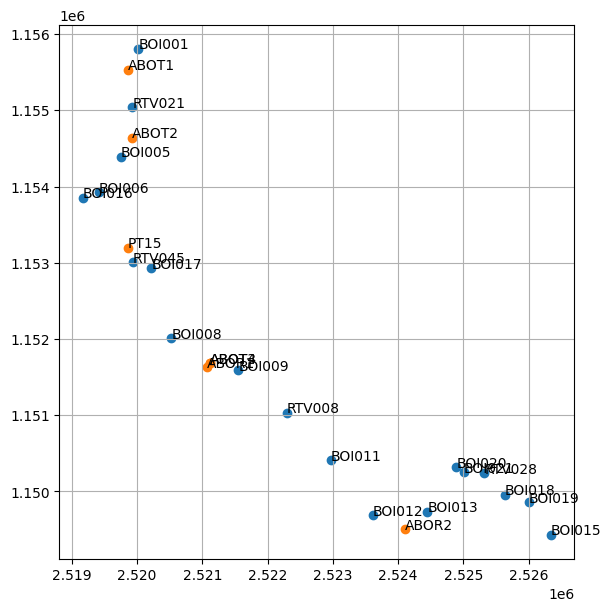

In [ ]:
pl.figure(figsize=(6,6), layout='constrained')
pl.scatter(water_stations['Coord X'], water_stations['Coord Y'])
pl.scatter(air_stations['Coord X'], air_stations['Coord Y'])
for ri,r in water_stations.iterrows():
    pl.text(r['Coord X'], r['Coord Y'], ri)
for ri,r in air_stations.iterrows():
    pl.text(r['Coord X'], r['Coord Y'], ri)
pl.grid()

In [ ]:
air_stations

,Coord X,Coord Y,Altitude
Station,,,
ABOR1,2521077,1151629,504.6
ABOT1,2519862,1155534,666.0
ABOT2,2519923,1154643,663.9
ABOT3,2521123,1151684,515.2
ABOR2,2524102,1149509,412.9
ABOT4,2521123,1151684,515.4
PT15,2519857,1153198,592.9


In [ ]:
water_stations

,CODE_RTV_2021,Coord X,Coord Y,Taux de recouvrement de la ripisylve (%),Altitude
CODE_MdlR,,,,,
RTV028,RTV_BOM_LEM_0388,2525323,1150240,100,388
BOI020,RTV_BLA_BOM_0397,2524895,1150320,100,397
BOI015,RTV_BOM_LEM_0372,2526344,1149431,100,372
BOI019,RTV_BOM_LEM_0379,2526007,1149860,75,379
BOI018,RTV_BOM_LEM_0383,2525635,1149957,80,383
BOI021,RTV_BOM_LEM_0392,2525010,1150251,100,392
BOI013,RTV_BOM_LEM_0406,2524447,1149734,100,406
BOI012,RTV_BOM_LEM_0421,2523618,1149689,100,421
BOI011,RTV_BOM_LEM_0440,2522970,1150411,90,440


In [ ]:
# Define a custom function to calculate the mean temperature, handling missing data appropriately
def custom_mean(series):
    numeric_values = pd.to_numeric(series, errors='coerce')
    return np.nanmean(numeric_values)

air_raw = []
for file_name in os.listdir(PATH):
    if file_name.startswith('air') and file_name.endswith('.csv'):
        print(file_name)
        temp = pd.read_csv(os.path.join(PATH, file_name))
        temp['datetime'] = pd.to_datetime(temp['Date et heure'], format='%d.%m.%Y %H:%M')
        temp.set_index('datetime', inplace=True)
        temp.drop(columns='Date et heure', inplace=True)
        air_raw.append(temp)
air_raw = pd.concat(air_raw)
air_raw.sort_index(inplace=True)

air_raw = air_raw.resample('30min').mean()

air_boiron_2016_2017.csv
air_boiron_2017_2023.csv


In [ ]:
air_raw

,ABOR1,ABOT1,ABOT2,ABOT3,ABOR2,ABOT4,PT15
datetime,,,,,,,
2016-06-11 17:00:00,18.80,NaN,NaN,14.9,NaN,NaN,NaN
2016-06-11 17:30:00,23.70,NaN,NaN,15.0,21.60,NaN,NaN
2016-06-11 18:00:00,23.20,NaN,NaN,15.2,20.95,NaN,NaN
2016-06-11 18:30:00,20.55,NaN,NaN,14.9,22.30,NaN,NaN
2016-06-11 19:00:00,21.15,NaN,NaN,14.8,22.60,NaN,NaN
...,...,...,...,...,...,...,...
2022-07-01 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,13.3
2022-07-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.3
2022-07-01 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,13.6


In [ ]:
daily_air = air_raw.groupby(pd.Grouper(freq='D')).agg(custom_mean)

/tmp/ipykernel_2616694/786280670.py:4: RuntimeWarning: Mean of empty slice
  return np.nanmean(numeric_values)


## SWISS METEO + BOIRON DATA

In [ ]:
PATH_DATA = r'/home/benoit.hohl/shared-projects/ML4WATER/RAW_DATA/'

In [ ]:
air_stations_total_metadata = pd.read_csv(os.path.join(PATH_DATA, 'air_boiron_and_swissmeteo_metadata.csv'),index_col=0)
air_stations_total_metadata

,Coord X,Coord Y,Altitude
Station,,,
ABOR1,2521077.0,1151629.0,504.6
ABOT1,2519862.0,1155534.0,666.0
ABOT2,2519923.0,1154643.0,663.9
ABOT3,2521123.0,1151684.0,515.2
ABOR2,2524102.0,1149509.0,412.9
ABOT4,2521123.0,1151684.0,515.4
PT15,2519857.0,1153198.0,592.9
AIG,2560404.0,1130713.0,381.0
BIE,2515887.0,1153210.0,683.0


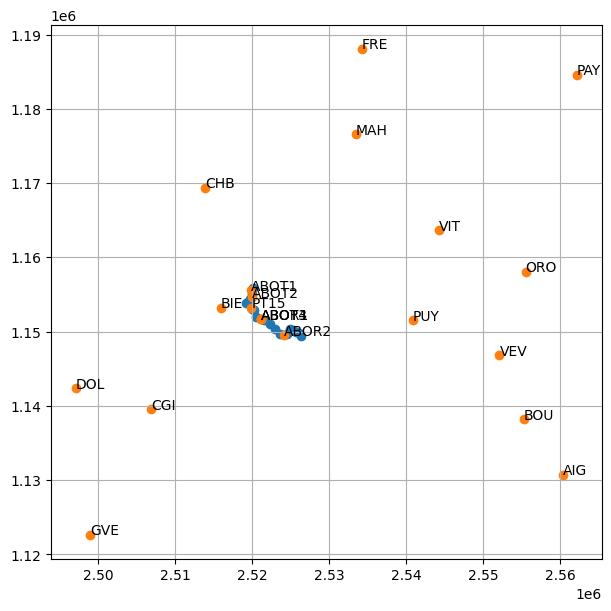

In [ ]:
pl.figure(figsize=(6,6), layout='constrained')
pl.scatter(water_stations['Coord X'], water_stations['Coord Y'])
# pl.scatter(air_stations['Coord X'], air_stations['Coord Y'])
pl.scatter(air_stations_total_metadata['Coord X'], air_stations_total_metadata['Coord Y'])
# for ri,r in water_stations.iterrows():
#     pl.text(r['Coord X'], r['Coord Y'], ri)
for ri,r in air_stations_total_metadata.iterrows():
    pl.text(r['Coord X'], r['Coord Y'], ri)
pl.grid()

In [ ]:
air_stations_total_data = pd.read_csv(os.path.join(PATH_DATA, '30MinFreq_air_boiron_and_swissmeteo_data.csv'),index_col=0)
air_stations_total_data

,ABOR1,ABOT1,ABOT2,ABOT3,ABOR2,ABOT4,PT15,BIE,CGI,CHB,MAH,PUY,VEV
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.866667,1.633333,NaN,0.066667,2.600000,NaN
2011-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.933333,1.766667,NaN,-0.066667,2.400000,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.900000,1.966667,NaN,-0.100000,2.333333,NaN
2011-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.966667,2.000000,NaN,-0.200000,2.300000,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.900000,2.000000,NaN,-0.300000,2.133333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.633333,21.566667,15.233333,20.433333,21.800000,23.100000
2023-07-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.266667,21.300000,15.100000,20.166667,22.366667,22.400000
2023-07-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.900000,21.366667,15.033333,19.233333,22.066667,22.233333


## INTERPOLATION

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import geopandas as gpd
leboiron = gpd.read_file('/content/gdrive/MyDrive/TFG/data/external/swissTLMboiron')
leboiron

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,MAT_BERGED,LARG_B_G,LARG_B_D,ZONE_RIVE_,ZONE_RIV_1,NAT_RIVE_G,NAT_RIVE_D,CLASSE_GE,SHAPE_Leng,geometry
0,{314640DC-12A0-4A01-9767-5A80BFF91EDC},2018-01-08,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519418.86 1158596.067 665.897, ..."
1,{70D1B6C0-2FDD-413F-9BCC-B0C07DF2AC83},2018-01-16,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2520045.344 1158450.453 670.292,..."
2,{8DB59E73-967F-405D-A0E1-836E28DDDD57},2018-01-08,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519444.198 1158810.427 665.399,..."
3,{1E0F48F0-E8A7-4833-B816-A0AF6093DFAB},2016-01-22,2009-02-13,2004,NaN,2020,6,Verbessert,swisstopo,2015,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2520612.266 1153557.781 623.184,..."
4,{4150AEB7-9493-45F8-AAC6-7C015849F043},2018-01-16,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519541.168 1158340.587 665.897,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,{FD8EEEA4-6DAE-4E72-9ECE-2209325B0E8A},2021-02-16,2016-01-21,2015,6.0,2020,6,Verbessert,swisstopo,2020,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2522310.42 1150400.885 481.578, ..."
339,{83050AC6-141B-45E9-8964-6438DFE380BC},2020-12-10,2016-01-14,2015,6.0,2020,6,Verbessert,swisstopo,2020,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2525385.535 1150795.403 419.528,..."
340,{600DB604-04D0-421E-A827-59414FA0C948},2018-01-16,2009-02-13,2005,NaN,2020,6,Verbessert,swisstopo,2017,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2519380.194 1158398.08 666.401, ..."
341,{5D7799C7-9927-4720-A440-6C32605ECBD9},2016-01-14,2009-02-13,2004,NaN,2020,6,Verbessert,swisstopo,2015,...,None,NaN,NaN,None,None,None,None,None,NaN,"LINESTRING Z (2525501.713 1153461.943 490.329,..."


In [12]:
for i, row in leboiron.iterrows():
    if row.geometry.type == 'LineString':
        projected_coords = list(row.geometry.coords)
        print(f"LineString {i} projected coordinates (in meters): {projected_coords}")

<ipython-input-12-8908d51c40da>:2: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if row.geometry.type == 'LineString':


LineString 0 projected coordinates (in meters): [(2519418.8599999994, 1158596.0670000017, 665.8969999999972), (2519413.4250000007, 1158599.9079999998, 665.851999999999), (2519406.5430000015, 1158605.9719999991, 665.851999999999), (2519401.9530000016, 1158611.9030000009, 665.851999999999), (2519395.307, 1158626.4030000009, 665.851999999999), (2519394.818, 1158638.7939999998, 665.851999999999), (2519401.085999999, 1158651.1860000007, 665.851999999999), (2519406.5119999982, 1158658.9629999995, 665.851999999999), (2519407.232000001, 1158666.4770000018, 665.8530000000028), (2519406.140999999, 1158674.7820000015, 665.8530000000028), (2519402.875, 1158687.6999999993, 665.8530000000028), (2519403.3539999984, 1158694.0269999988, 665.8530000000028), (2519405.886, 1158698.7729999982, 665.8530000000028), (2519408.6609999985, 1158699.1689999998, 665.8530000000028), (2519412.642999999, 1158700.7509999983, 665.8530000000028), (2519417.9499999993, 1158705.892000001, 665.8530000000028), (2519423.254000

<ipython-input-13-c576acf5b322>:8: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if row.geometry.type == 'LineString':


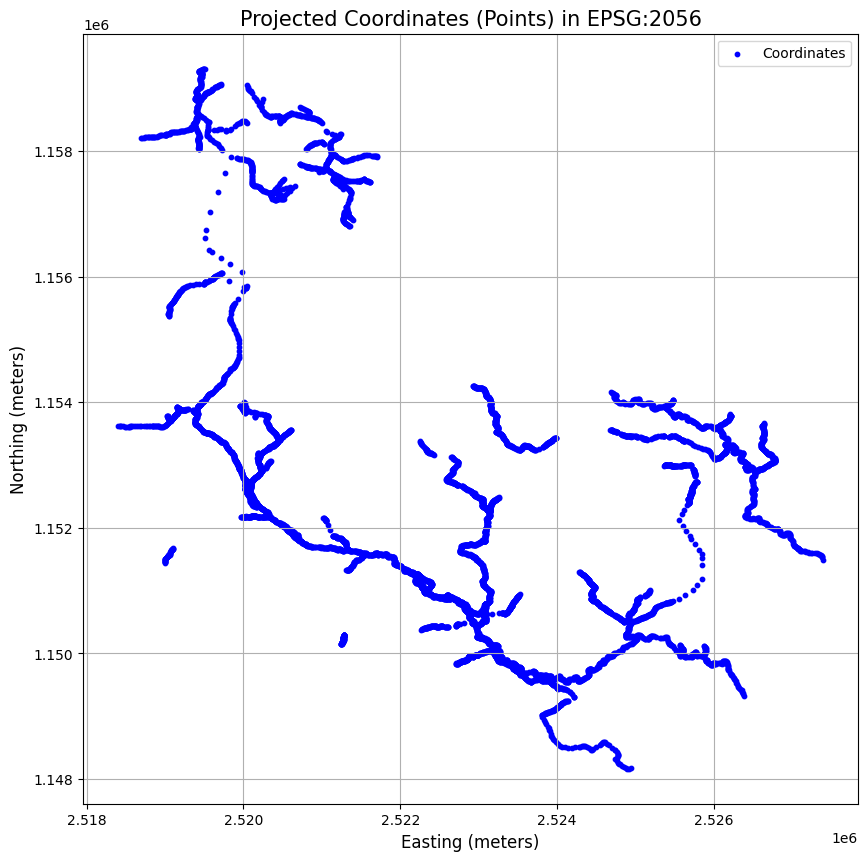

In [13]:
import matplotlib.pyplot as plt
# Initialize lists to store coordinates
x_coords = []
y_coords = []
z_coords = []

# Extract coordinates from LineStrings and store them as points
for i, row in leboiron.iterrows():
    if row.geometry.type == 'LineString':
        for x, y, z in row.geometry.coords:
            x_coords.append(x)
            y_coords.append(y)
            z_coords.append(z)

# Plot the points on a 2D grid
plt.figure(figsize=(10, 10))
plt.scatter(x_coords, y_coords, color='blue', s=10, label='Coordinates')

# Customize the plot
plt.title('Projected Coordinates (Points) in EPSG:2056', fontsize=15)
plt.xlabel('Easting (meters)', fontsize=12)
plt.ylabel('Northing (meters)', fontsize=12)

# Add gridlines
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [ ]:
def distance_matrix(x0, y0, x1, y1):
    """
    Calculate distance matrix.
    Note: from <http://stackoverflow.com/questions/1871536>
    """

    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    d0 = np.subtract.outer(obs[:, 0], interp[:, 0])
    d1 = np.subtract.outer(obs[:, 1], interp[:, 1])

    # calculate hypotenuse
    return np.hypot(d0, d1)


def simple_idw(x, y, z, xi, yi, beta=2):
    """
    Simple inverse distance weighted (IDW) interpolation
    x`, `y`,`z` = known data arrays containing coordinates and data used for interpolation
    `xi`, `yi` =  two arrays of grid coordinates
    `beta` = determines the degree to which the nearer point(s) are preferred over more distant points.
            Typically 1 or 2 (inverse or inverse squared relationship)
    """

    dist = distance_matrix(x, y, xi, yi)

    # In IDW, weights are 1 / distance
    # weights = 1.0/(dist+1e-12)**power
    weights = dist ** (-beta)

    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    return np.dot(weights.T, z)

In [ ]:
columns=water_stations.index
columns

Index(['RTV028', 'BOI020', 'BOI015', 'BOI019', 'BOI018', 'BOI021', 'BOI013',
       'BOI012', 'BOI011', 'RTV008', 'BOI009', 'RTV045', 'BOI006', 'BOI005',
       'BOI001', 'RTV021', 'BOI017', 'BOI008', 'BOI016'],
      dtype='object', name='CODE_MdlR')

In [ ]:
LR = 5.5
air_interpolated = pd.DataFrame(columns=water_stations.index)

for ri,r in air_stations_total_data.iterrows():
    temp = pd.concat([pd.DataFrame(r.values, index=r.index, columns=['temp',]), air_stations_total_metadata], axis=1)
    temp.dropna(inplace=True)

    temp['temp'] += LR * temp['Altitude'] / 1000

    if len(temp) == 0:
        a = np.empty(water_stations.shape[0])
        a[:] = np.nan
        air_interpolated.loc[ri] = a
    else:
        x = temp['Coord X']
        y = temp['Coord Y']
        z = temp['temp']

        xi = water_stations['Coord X']
        yi = water_stations['Coord Y']

        temp_interpolated = simple_idw(x, y, z, xi, yi, beta=2)
        temp_interpolated -= LR * water_stations['Altitude']  / 1000

        air_interpolated.loc[ri] = temp_interpolated


In [ ]:
air_interpolated.to_csv('30MinFreq_air_interpolated_2008_2024.csv', header=True)